# 回归任务

## 任务一：读取数据并可视化

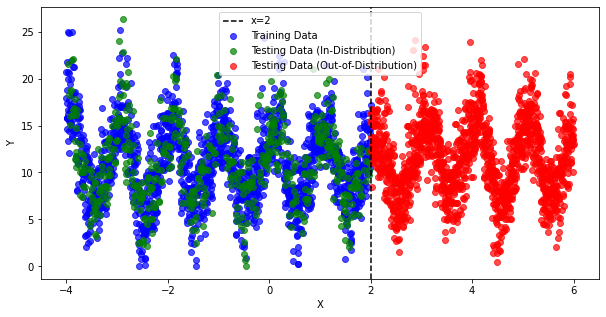

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.optim as optim

#读取数据
data_test = pd.read_csv('D:\python_protect\机器学习\实验三\回归-dataset\data_test.csv')
data_train = pd.read_csv('D:\python_protect\机器学习\实验三\回归-dataset\data_train.csv')
data_valid = pd.read_csv('D:\python_protect\机器学习\实验三\回归-dataset\data_valid.csv')

# 合并数据集(分布外)
test_data_o = pd.concat([data_valid, data_test], ignore_index=True)

# 划分训练集和测试集（分布内）
train_data, test_data_i = train_test_split(data_train, test_size=0.25, random_state=42)

# 将数据转换为 PyTorch 张量
train_data_tensor = torch.tensor(train_data.values, dtype=torch.float32)
test_data_i_tensor = torch.tensor(test_data_i.values, dtype=torch.float32)
test_data_o_tensor = torch.tensor(test_data_o.values, dtype=torch.float32)

# 可视化三个数据集
plt.figure(figsize=(10, 5))
plt.scatter(train_data_tensor[:, 0], train_data_tensor[:, 1], label='Training Data', alpha=0.7, color='blue')
plt.scatter(test_data_i_tensor[:, 0], test_data_i_tensor[:, 1], label='Testing Data (In-Distribution)', alpha=0.7, color='green')
plt.scatter(test_data_o_tensor[:, 0], test_data_o_tensor[:, 1], label='Testing Data (Out-of-Distribution)', alpha=0.7, color='red')
plt.axvline(x=2, color='black', linestyle='--', label='x=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [4]:

class NetWork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NetWork,self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return x

In [5]:
input_size = 1  # 只有一个输入特征
output_size = 1  # 一个输出

# 构建数据加载器
train_dataset = TensorDataset(train_data_tensor[:, 0].view(-1, 1), train_data_tensor[:, 1].view(-1, 1))
test_i_dataset = TensorDataset(test_data_i_tensor[:, 0].view(-1, 1), test_data_i_tensor[:, 1].view(-1, 1))
test_o_dataset = TensorDataset(test_data_o_tensor[:, 0].view(-1, 1), test_data_o_tensor[:, 1].view(-1, 1))

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_i_loader = DataLoader(test_i_dataset, batch_size=batch_size, shuffle=False)
test_o_loader = DataLoader(test_o_dataset, batch_size=batch_size, shuffle=False)


In [111]:
def train(model, train_loader, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

def evaluate(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            all_predictions.extend(outputs.numpy())
            all_targets.extend(targets.numpy())
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
    return rmse, all_predictions


# 画出回归曲线
def plot_regression_curve(model, x_range, title):
    plt.figure(figsize=(8, 5))
     # 在测试集内画出回归曲线
    _, predictions_in = evaluate(model, test_i_loader)
    plt.plot(test_data_i_tensor[:, 0], predictions_in, 'o', label='Regression Curve (In-Distribution)', markersize=3, color='purple')
    print(test_data_i_tensor[:, 0].shape)
    # 在测试集外画出回归曲线
    _, predictions_out = evaluate(model, test_o_loader)
    plt.plot(test_data_o_tensor[:, 0], predictions_out, 's', label='Regression Curve (Out-of-Distribution)', markersize=3, color='brown')
    print(test_data_o_tensor[:, 0].shape)
    plt.scatter(train_data_tensor[:, 0], train_data_tensor[:, 1], label='Training Data', alpha=0.7, color='blue')
    plt.scatter(test_data_i_tensor[:, 0], test_data_i_tensor[:, 1], label='Testing Data (In-Distribution)', alpha=0.7, color='green')
    plt.scatter(test_data_o_tensor[:, 0], test_data_o_tensor[:, 1], label='Testing Data (Out-of-Distribution)', alpha=0.7, color='red')
    plt.axvline(x=2, color='black', linestyle='--', label='x=2')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()



Epoch [1/70], Loss: 6.4929
Epoch [2/70], Loss: 8.2962
Epoch [3/70], Loss: 4.3561
Epoch [4/70], Loss: 16.4182
Epoch [5/70], Loss: 13.9526
Epoch [6/70], Loss: 30.4719
Epoch [7/70], Loss: 12.4733
Epoch [8/70], Loss: 23.5545
Epoch [9/70], Loss: 10.4894
Epoch [10/70], Loss: 38.3924
Epoch [11/70], Loss: 9.7041
Epoch [12/70], Loss: 16.0035
Epoch [13/70], Loss: 7.4544
Epoch [14/70], Loss: 28.3805
Epoch [15/70], Loss: 25.1499
Epoch [16/70], Loss: 21.7881
Epoch [17/70], Loss: 38.9929
Epoch [18/70], Loss: 16.7703
Epoch [19/70], Loss: 12.7836
Epoch [20/70], Loss: 10.6236
Epoch [21/70], Loss: 20.3479
Epoch [22/70], Loss: 17.7393
Epoch [23/70], Loss: 19.9521
Epoch [24/70], Loss: 51.2395
Epoch [25/70], Loss: 7.1520
Epoch [26/70], Loss: 21.0544
Epoch [27/70], Loss: 27.3261
Epoch [28/70], Loss: 13.1428
Epoch [29/70], Loss: 9.3298
Epoch [30/70], Loss: 13.4986
Epoch [31/70], Loss: 19.9288
Epoch [32/70], Loss: 24.7954
Epoch [33/70], Loss: 17.5800
Epoch [34/70], Loss: 16.1214
Epoch [35/70], Loss: 19.7154
E

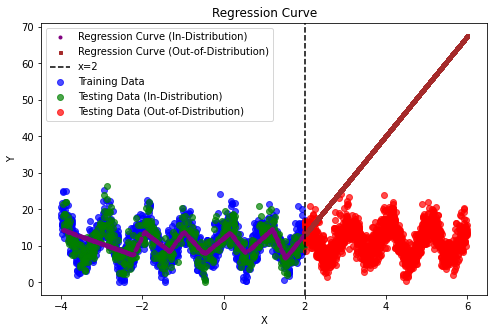

In [114]:
# 创建模型
model = NetWork(input_size, 64, 32, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

# 训练模型
train(model, train_loader, criterion, optimizer, num_epochs=70)

# 在测试集上评估
test_rmse,_ = evaluate(model, test_i_loader)
print(f'Test RMSE (In-Distribution): {test_rmse}')

# 在分布外数据集上评估
out_of_distribution_rmse,_ = evaluate(model, test_o_loader)
print(f'Test RMSE (Out-of-Distribution): {out_of_distribution_rmse}')

# 画出回归曲线
plot_regression_curve(model, x_range=np.linspace(0, 6, 100), title='Regression Curve')

## 任务二：仅使用numpy来进行回归任务

数据集进行处理，划分Bacth_size 最后做了转置是为了将x, y的维度转化为（1，n);n是Batch_size

In [ ]:
class RegressionData:
    def __init__(self, train_data, test_i_data, test_o_data, batch_size=32):
        self.batch_size = batch_size

        # 将训练数据调整为可以整除 batch_size 的形状
        train_size = (len(train_data) // batch_size) * batch_size
        self.x_train = train_data.iloc[:train_size, 0].values.reshape((-1, batch_size, 1))
        self.y_train = train_data.iloc[:train_size, 1].values.reshape((-1, batch_size, 1))

        # 同样处理测试集数据
        test_i_size = (len(test_i_data) // batch_size) * batch_size
        self.x_i_test = test_i_data.iloc[:test_i_size, 0].values.reshape((-1, batch_size, 1))
        self.y_i_test = test_i_data.iloc[:test_i_size, 1].values.reshape((-1, batch_size, 1))

        test_o_size = (len(test_o_data) // batch_size) * batch_size
        self.x_o_test = test_o_data.iloc[:test_o_size, 0].values.reshape((-1, batch_size, 1))
        self.y_o_test = test_o_data.iloc[:test_o_size, 1].values.reshape((-1, batch_size, 1))

        self.total_batches = len(self.x_train)
        self.total_batches_i = len(self.x_i_test)
        self.total_batches_o = len(self.x_o_test)

    def get_batch_data(self, i):
        x_batch = self.x_train[i].T
        y_batch = self.y_train[i].T
        return x_batch, y_batch

    def get_batch_i_data(self, i):
        x_batch = self.x_i_test[i].T
        y_batch = self.x_i_test[i].T
        return x_batch, y_batch
    def get_batch_o_data(self, i):
        x_batch = self.x_o_test[i].T
        y_batch = self.x_o_test[i].T
        return x_batch, y_batch


1. **权重矩阵：**
   - `w1` 是一个形状为（1，h_dim）的权重矩阵，其中 `h_dim` 是隐藏层的维度，这表示第一层的权重。
   - `w2` 是一个形状为（h_dim，h_dim）的权重矩阵，用于连接隐藏层的上一层和下一层。
   - `w3` 是一个形状为（h_dim，1）的权重矩阵，用于连接隐藏层和输出层。

2. **中间变量 delta：**
   - `delta1` 是一个形状为（h_dim，32）的中间变量，表示隐藏层对输入的误差梯度。
   - `delta2` 是一个形状为（h_dim，32）的中间变量，表示输出层对隐藏层的误差梯度。
   - `delta3` 是一个形状为（1，32）的中间变量，表示最终输出对隐藏层的误差梯度。

3. **维度信息：**
   - `h_dim` 是隐藏层的维度，设置为 64。
   - `batch_size` 是每个训练批次的样本数量，设置为 32。
   - `y_hat` 是模型的预测输出，形状为（1，32）。
   - `y` 是实际的目标输出，形状也为（1，32）。

 神经网络结构包括一个输入层，一个隐藏层（64维），一个输出层。权重矩阵 `w1` 连接输入和隐藏层，`w2` 连接隐藏层和隐藏层，`w3` 连接隐藏层和输出层。`delta1` 和 `delta2` 是隐藏层的误差梯度，而 `delta3` 是最终输出的误差梯度。

In [57]:
class NumpyNetwork:
    def __init__(self, x_dim, h_dim, y_dim):

        self.w1 = self._uniform([x_dim, h_dim])
        self.b1 = self._uniform([h_dim, 1])

        self.w2 = self._uniform([h_dim, h_dim])
        self.b2 = self._uniform([h_dim, 1])

        self.w3 = self._uniform([h_dim, y_dim])
        self.b3 = self._uniform([y_dim, 1])
    def _uniform(self, shape):
        """
        初始化权重矩阵
        """
        initial_w = np.random.uniform(-1, 1, size=shape).astype(np.float32)
        return  initial_w

    def mse_loss(self, y_pred, y):
        self.y = y
        return np.mean((y_pred - y)**2)

    def _sigmoid(self, x):
        x = np.clip(x, -88.72, 88.72) #防止分母上指数函数的计算溢出
        return 1 / (1 + np.exp(-x))
    def forward(self, x):
        self.x = x
        # print(f'x{self.x.shape},w1{self.w1.shape},w2{self.w2.shape}w3{self.w3.shape}')
        self.z1 = self.w1.T @ self.x + self.b1
        self.a1 = self._sigmoid(self.z1)

        self.z2 = self.w2.T @ self.a1 + self.b2
        self.a2 = self._sigmoid(self.z2)

        self.z3 = self.w3.T @ self.a2 + self.b3
        self.y_hat = 1 * self.z3
        # print(self.y_hat.shape)
        return self.y_hat
    def backward(self):
        n = self.y.shape[1]
        # print(n)
        # (BP1)
        self.delta_3 = self.y_hat - self.y
        # print(f'delta3{self.delta_3.shape}y_hat{self.y_hat.shape}y{self.y.shape}')

        # (BP2)
        self.delta_2 = self.w3 @ self.delta_3 * (self._sigmoid(self.z2) * (1 - self._sigmoid(self.z2)))
        self.delta_1 = self.w2 @ self.delta_2 * (self._sigmoid(self.z1) * (1 - self._sigmoid(self.z1)))

        # print(f'delta2{self.delta_2.shape}delta1{self.delta_1.shape}')
        # print(f"a1{self.a1.shape}a2{self.a2.shape}")
        # (BP3)
        self.w_g3 =  1/n * self.a2 @ self.delta_3.T
        self.w_g2 =  1/n * self.a1 @ self.delta_2.T
        self.w_g1 =  1/n * self.x @ self.delta_1.T
        # print(f'wg3{self.w_g3.shape}, w2{self.w_g2.shape},w1{self.w_g1.shape}')
        # (BP4)
        self.b_g3 = self.delta_3.mean(axis=1, keepdims=True)
        self.b_g2 = self.delta_2.mean(axis=1, keepdims=True)
        self.b_g1 = self.delta_1.mean(axis=1, keepdims=True)
    def zero_gard(self):
        self.deltal_3 = 0
        self.deltal_2 = 0
        self.deltal_1 = 0
        # BP3
        self.w_g3 = 0
        self.w_g2 = 0
        self.w_g1 = 0

        # BP4
        self.b_g3 = 0
        self.b_g2 = 0
        self.b_g1 = 0

    def step(self, lr=0.001):
        self.w1 -= lr * self.w_g1
        self.b1 -= lr * self.b_g1

        self.w2 -= lr * self.w_g2
        self.b2 -= lr * self.b_g2

        self.w3 -= lr * self.w_g3
        self.b3 -= lr * self.b_g3


In [58]:
def train_regression_model(model, dataset, num_epochs=100, lr=0.001):
    for epoch in range(num_epochs):
        total_loss = 0.0

        for i in range(dataset.total_batches):
            x_batch, y_batch = dataset.get_batch_data(i)
            # print(f"x{x_batch},y:{y_batch}")

            # Forward pass
            y_pred = model.forward(x_batch)

            # Compute loss
            loss = model.mse_loss(y_pred, y_batch)
            total_loss += loss

            # Backward pass
            model.backward()

            # Gradient descent step
            model.step(lr=lr)
            model.zero_gard()

        avg_loss = total_loss / dataset.total_batches
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')



画图函数

In [66]:
def evaluate(model, dataset):
    all_predictions_i = []
    all_targets_i = []

    for i in range(dataset.total_batches_i):

        x_batch, y_batch = dataset.get_batch_i_data(i)
        outputs = model.forward(x_batch)
        all_predictions_i.extend(outputs.tolist())
        all_targets_i.extend(x_batch.tolist())

    all_predictions_i = np.array(all_predictions_i)
    all_targets_i = np.array(all_targets_i)

    rmse_i = np.sqrt(mean_squared_error(all_targets_i, all_predictions_i))

    all_predictions_o = []
    all_targets_o = []

    for i in range(dataset.total_batches_o):

        x_batch, y_batch = dataset.get_batch_o_data(i)
        outputs = model.forward(x_batch)
        all_predictions_o.extend(outputs.tolist())
        all_targets_o.extend(x_batch.tolist())

    all_predictions_o = np.array(all_predictions_o)
    all_targets_o = np.array(all_targets_o)

    rmse_o = np.sqrt(mean_squared_error(all_targets_o, all_predictions_o))
    return rmse_i, all_predictions_i, all_targets_i, rmse_o, all_predictions_o, all_targets_o


# 画出回归曲线
def plot_regression_curve(model, title):
    plt.figure(figsize=(16, 10))

    rmse_i, all_predictions_i, all_targets_i, rmse_o, all_predictions_o, all_targets_o = evaluate(model, dataset)

    print(f'TEST_RMSE_IN:{rmse_i}, TEST_RMSE-OUT:{rmse_o}')
    # print(all_targets_i.shape)
    # print(all_targets_o.shape)
    plt.scatter(dataset.x_train.flatten(), dataset.y_train.flatten(),
                label='Training Data', alpha=0.7, color='blue')
    plt.scatter(dataset.x_i_test.flatten(), dataset.y_i_test.flatten(),
                label='Testing Data (In-Distribution)', alpha=0.7, color='green')
    plt.scatter(dataset.x_o_test.flatten(), dataset.y_o_test.flatten(),
                label='Testing Data (Out-of-Distribution)', alpha=0.7, color='black')
    plt.axvline(x=2, color='black', linestyle='--', label='x=2')

     # 在测试集内画出回归曲线
    plt.plot(all_targets_i, all_predictions_i, 'o',  markersize=3, color='red')
    # 在测试集外画出回归曲线
    plt.plot(all_targets_o, all_predictions_o, 's', markersize=3, color='red')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()



In [67]:
# 首先初始化数据集和模型
dataset = RegressionData(train_data, test_data_i, test_data_o, batch_size=32)
model = NumpyNetwork(x_dim=1, h_dim=64, y_dim=1)

# 然后调用训练函数
train_regression_model(model, dataset, num_epochs=1000, lr=0.001)

Epoch [1/1000], Loss: 37.7619
Epoch [2/1000], Loss: 17.7784
Epoch [3/1000], Loss: 17.4063
Epoch [4/1000], Loss: 17.4006
Epoch [5/1000], Loss: 17.3949
Epoch [6/1000], Loss: 17.3883
Epoch [7/1000], Loss: 17.3818
Epoch [8/1000], Loss: 17.3756
Epoch [9/1000], Loss: 17.3696
Epoch [10/1000], Loss: 17.3639
Epoch [11/1000], Loss: 17.3583
Epoch [12/1000], Loss: 17.3529
Epoch [13/1000], Loss: 17.3476
Epoch [14/1000], Loss: 17.3425
Epoch [15/1000], Loss: 17.3376
Epoch [16/1000], Loss: 17.3327
Epoch [17/1000], Loss: 17.3281
Epoch [18/1000], Loss: 17.3235
Epoch [19/1000], Loss: 17.3191
Epoch [20/1000], Loss: 17.3148
Epoch [21/1000], Loss: 17.3106
Epoch [22/1000], Loss: 17.3065
Epoch [23/1000], Loss: 17.3025
Epoch [24/1000], Loss: 17.2987
Epoch [25/1000], Loss: 17.2949
Epoch [26/1000], Loss: 17.2912
Epoch [27/1000], Loss: 17.2877
Epoch [28/1000], Loss: 17.2842
Epoch [29/1000], Loss: 17.2808
Epoch [30/1000], Loss: 17.2775
Epoch [31/1000], Loss: 17.2743
Epoch [32/1000], Loss: 17.2712
Epoch [33/1000], 

TEST_RMSE_IN:12.297209320808582, TEST_RMSE-OUT:5.597637765251514


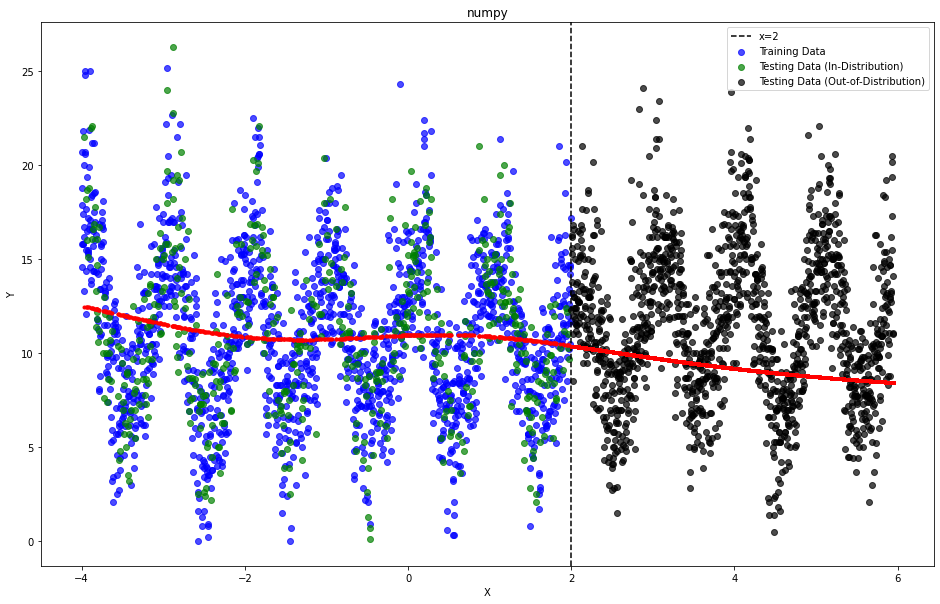

In [68]:
plot_regression_curve(model, 'numpy')

发现拟合效果较差，增加了epoch和学习率,结果显著

In [59]:

# 首先初始化数据集和模型
dataset = RegressionData(train_data, test_data_i, test_data_o, batch_size=32)
model = NumpyNetwork(x_dim=1, h_dim=64, y_dim=1)

# 然后调用训练函数
train_regression_model(model, dataset, num_epochs=10000, lr=0.005)


Epoch [1/10000], Loss: 35.8343
Epoch [2/10000], Loss: 17.4599
Epoch [3/10000], Loss: 17.3929
Epoch [4/10000], Loss: 17.3624
Epoch [5/10000], Loss: 17.3419
Epoch [6/10000], Loss: 17.3251
Epoch [7/10000], Loss: 17.3106
Epoch [8/10000], Loss: 17.2978
Epoch [9/10000], Loss: 17.2863
Epoch [10/10000], Loss: 17.2760
Epoch [11/10000], Loss: 17.2668
Epoch [12/10000], Loss: 17.2585
Epoch [13/10000], Loss: 17.2510
Epoch [14/10000], Loss: 17.2442
Epoch [15/10000], Loss: 17.2380
Epoch [16/10000], Loss: 17.2323
Epoch [17/10000], Loss: 17.2270
Epoch [18/10000], Loss: 17.2222
Epoch [19/10000], Loss: 17.2177
Epoch [20/10000], Loss: 17.2136
Epoch [21/10000], Loss: 17.2097
Epoch [22/10000], Loss: 17.2061
Epoch [23/10000], Loss: 17.2027
Epoch [24/10000], Loss: 17.1995
Epoch [25/10000], Loss: 17.1966
Epoch [26/10000], Loss: 17.1937
Epoch [27/10000], Loss: 17.1911
Epoch [28/10000], Loss: 17.1885
Epoch [29/10000], Loss: 17.1861
Epoch [30/10000], Loss: 17.1838
Epoch [31/10000], Loss: 17.1816
Epoch [32/10000],

TEST_RMSE_IN:12.716528143749853, TEST_RMSE-OUT:12.711992822487835


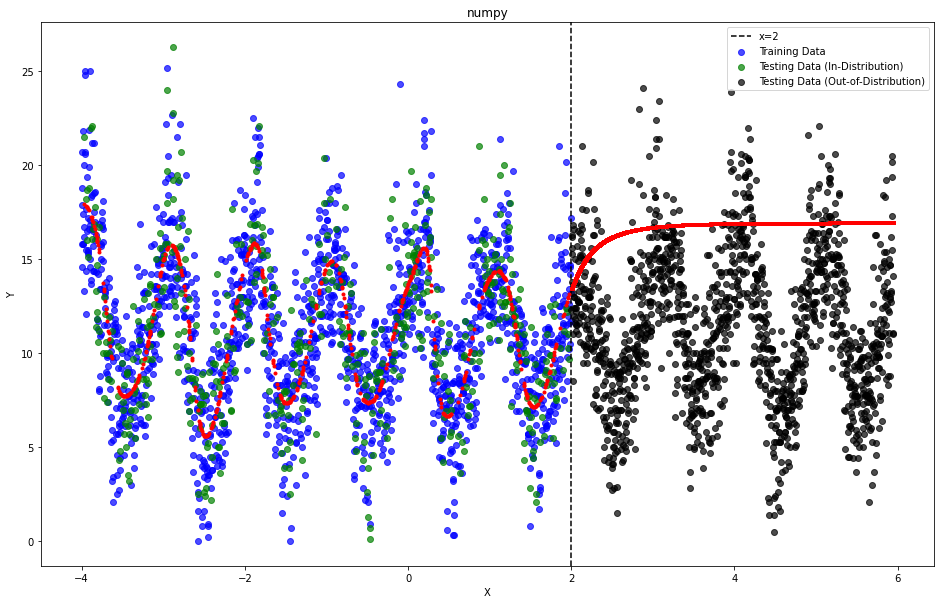

In [65]:
plot_regression_curve(model, 'numpy')